In [1]:
#Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [46]:
# Read Dataset
dataset = pd.read_csv('C:\\Users\Ana\Documents\home\Master-TIC\Curso_2016-17\wine.csv',delimiter=',',header=0)
dataset


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [47]:
# Header
header = []
for row in dataset:
    header.append(row)
header

['Wine',
 'Alcohol',
 'Malic.acid',
 'Ash',
 'Acl',
 'Mg',
 'Phenols',
 'Flavanoids',
 'Nonflavanoid.phenols',
 'Proanth',
 'Color.int',
 'Hue',
 'OD',
 'Proline']

In [48]:
print(dataset.describe()) #Descripción de los datos


             Wine     Alcohol  Malic.acid         Ash         Acl          Mg  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoid.phenols     Proanth   Color.int  \
count  178.000000  178.000000            178.000000  178.000000  178.000000   
mean     2.295112    2.029270              0.361854    1.590899    5.058090   
std      0.625851    0.998859    

In [49]:
correlation=dataset.corr() #Correlation Matrix
correlation

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


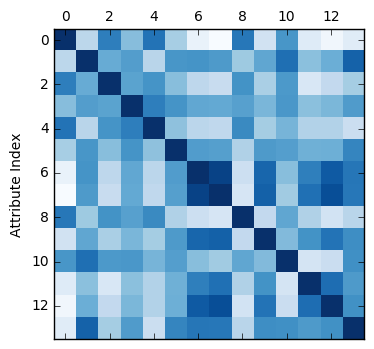

In [50]:
# Display the correlation matrix with a specified figure number and a bluescale
# colormap
plt.figure()
plt.matshow(correlation, fignum=1, cmap=plt.cm.Blues)
plt.ylabel("Attribute Index")
plt.show()

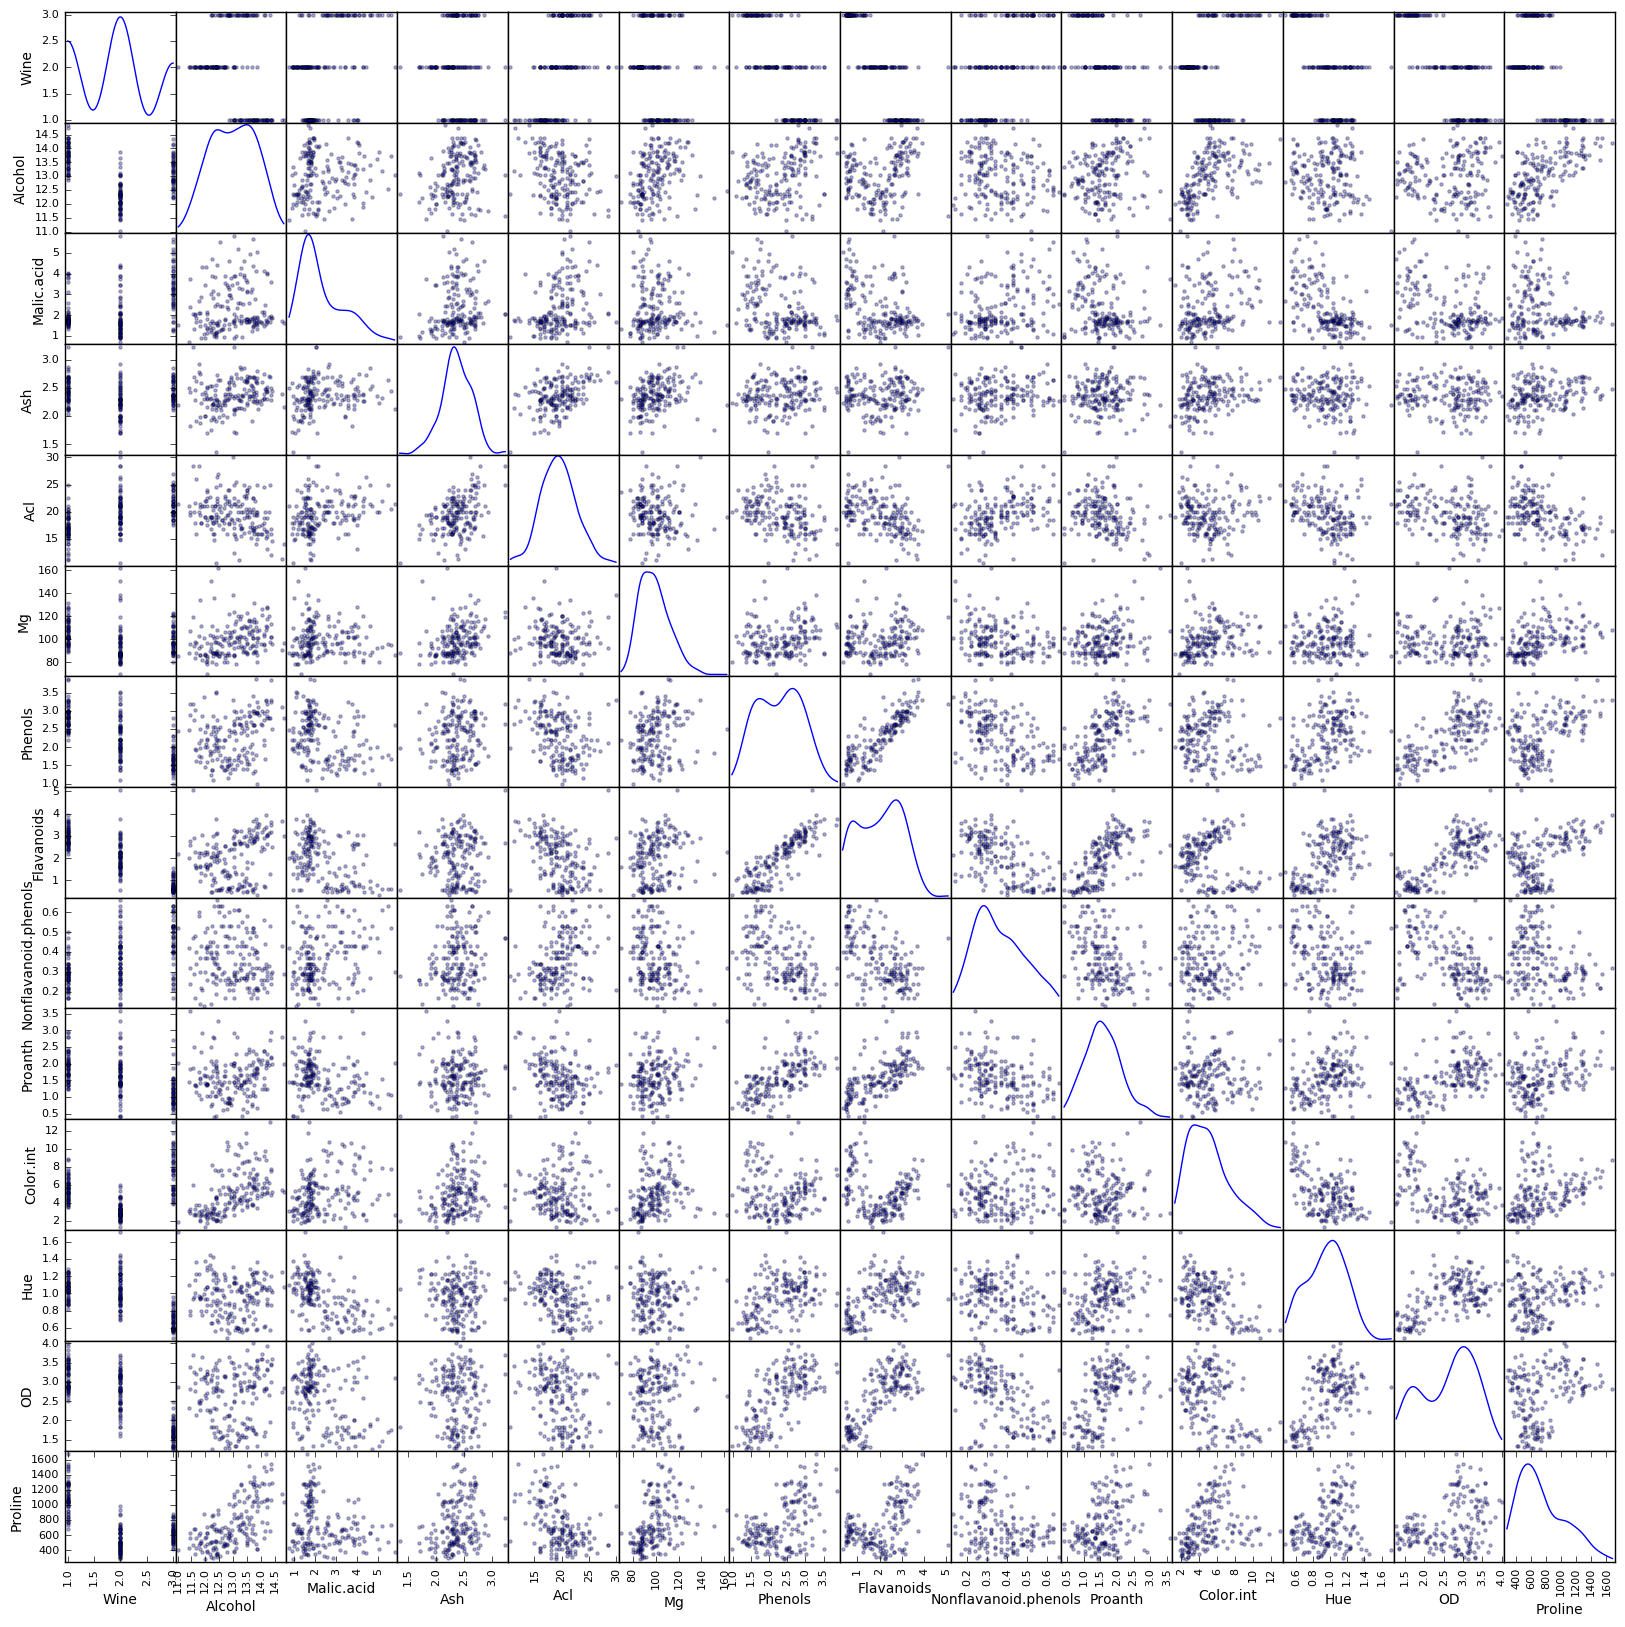

In [51]:
#### Scatter Matrix Plot

plt.figure()
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dataset, alpha=0.3, figsize=(20, 20), diagonal='kde')
plt.show()

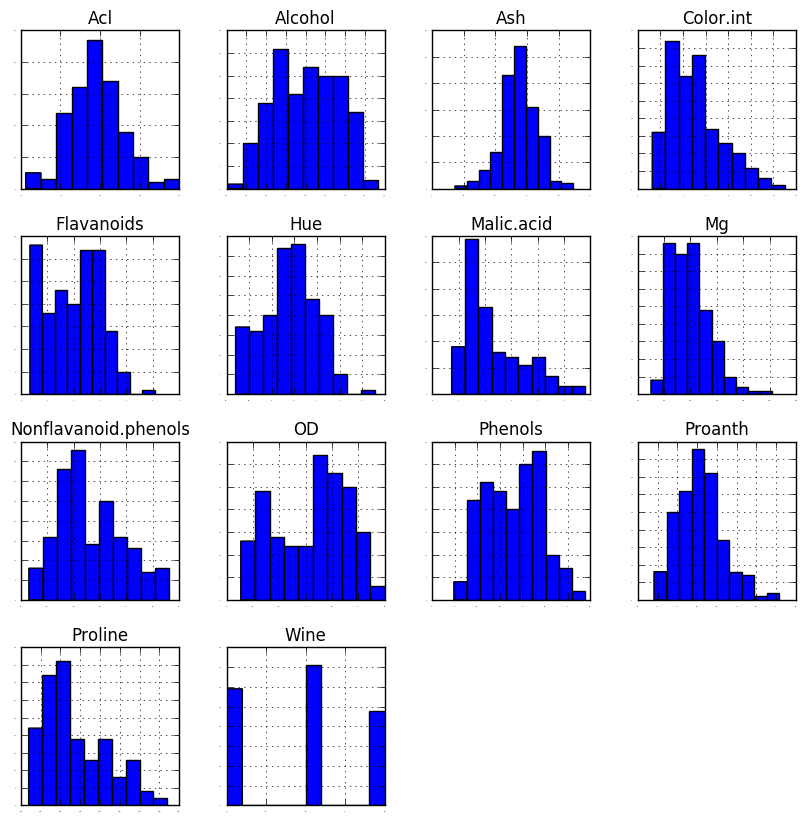

In [52]:
#### Histogram Matrix Plot

plt.figure()
dataset.hist(xlabelsize=0.5, ylabelsize=0.2,figsize=(10,10))
plt.xlabel("Data")
plt.show()

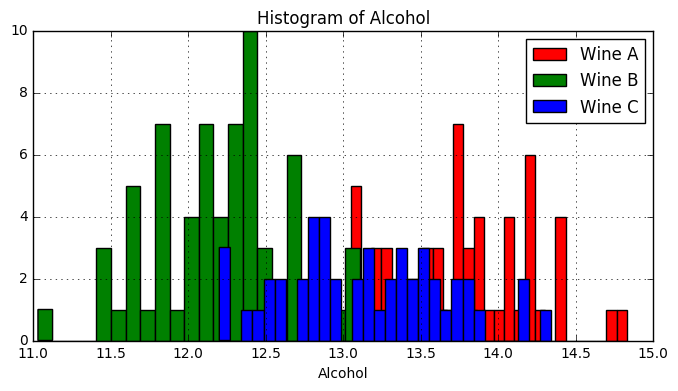

In [53]:
### Histogram of Alcohol variable

plt.figure(figsize=(8,4))
plt.hist(dataset[dataset.Wine==1].Alcohol, 30, facecolor='r')
plt.hist(dataset[dataset.Wine==2].Alcohol, 30, facecolor='g')
plt.hist(dataset[dataset.Wine==3].Alcohol, 30, facecolor='b')
plt.title('Histogram of Alcohol')
plt.legend(['Wine A','Wine B','Wine C'])
plt.xlabel("Alcohol")
plt.grid(True)
plt.show()


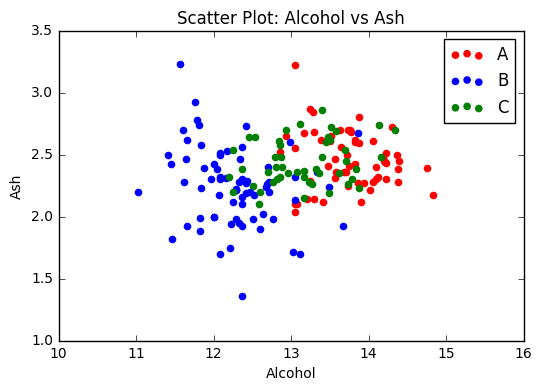

In [54]:

### Scatter Plot Alcohol vs Ash

plt.figure()
plt.scatter(dataset[dataset.Wine==1].Alcohol,dataset[dataset.Wine==1].Ash, color='red')
plt.scatter(dataset[dataset.Wine==2].Alcohol,dataset[dataset.Wine==2].Ash, color='blue')
plt.scatter(dataset[dataset.Wine==3].Alcohol,dataset[dataset.Wine==3].Ash, color='green')
plt.title('Scatter Plot: Alcohol vs Ash')
plt.xlabel('Alcohol')
plt.ylabel('Ash')
plt.legend(['A','B','C'])
plt.show()


División de la muestra en Train y Test de forma aleatoria

In [55]:
def dividir_ent_test(dataframe, porcentaje=0.7):
    """ 
    Función que divide un dataframe aleatoriamente en entrenamiento y en test.
    Recibe los siguientes argumentos:
    - dataframe: DataFrame que vamos a utilizar para extraer los datos
    - porcentaje: porcentaje de patrones en entrenamiento
    Devuelve:
    - train: DataFrame con los datos de entrenamiento
    - test: DataFrame con los datos de test
    """
    mascara = np.random.rand(len(dataframe)) < porcentaje
    train = dataframe[mascara]
    test = dataframe[~mascara]
    return train, test

wine_train, wine_test = dividir_ent_test(dataset)
print ("wine_train", wine_train.shape,"\n")
print ("wine_test",wine_test.shape,"\n")

wine_train (121, 14) 

wine_test (57, 14) 



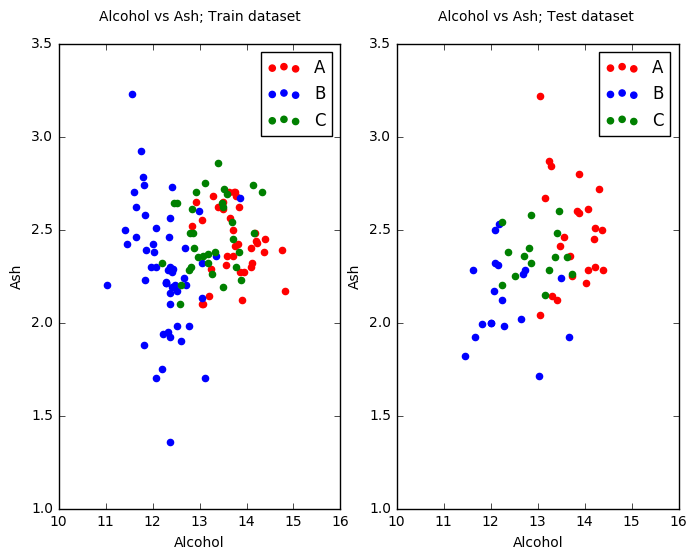

In [56]:
### Scatter Plot Alcohol vs Ash

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.scatter(wine_train[wine_train.Wine==1].Alcohol,wine_train[wine_train.Wine==1].Ash, color='red')
plt.scatter(wine_train[wine_train.Wine==2].Alcohol,wine_train[wine_train.Wine==2].Ash, color='blue')
plt.scatter(wine_train[wine_train.Wine==3].Alcohol,wine_train[wine_train.Wine==3].Ash, color='green')
plt.title('Alcohol vs Ash; Train dataset\n',fontsize=10)
plt.xlabel('Alcohol',fontsize=10)
plt.ylabel('Ash')
plt.legend(['A','B','C'])
plt.xlim(10,16)
plt.ylim (1,3.5)

plt.subplot(122)
plt.scatter(wine_test[wine_test.Wine==1].Alcohol,wine_test[wine_test.Wine==1].Ash, color='red')
plt.scatter(wine_test[wine_test.Wine==2].Alcohol,wine_test[wine_test.Wine==2].Ash, color='blue')
plt.scatter(wine_test[wine_test.Wine==3].Alcohol,wine_test[wine_test.Wine==3].Ash, color='green')
plt.title('Alcohol vs Ash; Test dataset \n',fontsize=10)
plt.xlabel('Alcohol', fontsize=10)
plt.ylabel('Ash')
plt.legend(['A','B','C'])
plt.xlim(10,16)
plt.ylim (1,3.5)
plt.show()